# K-Means

Para a realização desse procedimento, é preciso que o número de clusters seja definido a priori. O método K-means segue a seguinte sequência lógica:

- 1) Defini-se a quantidade inicial de clusters e os respectivos centroides (pontos centrais iniciais). O objetivo é dividir as observações em K clusters de modo que aquelas dentro de cada cluster estejam mais próximas entre si se comparadas a qualquer outra pertecente a um diferente.
- 2) Deve-se realocar as observações mais proxímas de um centróide para seu respectivo cluster. Neste momento, outro cluster acaba de perder aquela observação, e, portanto, devem ser recalculados os centroides do cluster que a recebe e os do cluster que a perde. 
- 3) Devemos proceder com o passo anterior até que não seja mais possível realocar observação alguma por maior proximidade a um centroide de outro cluster. 

As coordenadas do centróide é recalculada quando a inclusão/exclusão de determinada observaçao p no respectivo cluster for feita, com base nas seguintes expressões:

- $\bar{x}_{novo}=\frac{N* \bar{x} + x_{p}}{N+1}$, no caso de observação inserida no cluster;

- $\bar{x}_{novo}=\frac{N* \bar{x} + x_{p}}{N-1}$, no caso de observação excluída no cluster;

De modo que, $N$ e $\bar{x}$, são a quantidade de observações no cluster e a coordenada de seu centróide, respectivamente.


In [75]:
#Libraries

#----- Data and numerical operations -----#
import numpy as np
import pandas as pd

#----- Graph and Charts -----#
from matplotlib import pyplot as plt
import seaborn as sns

#----- K-means -----#
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#----- ANOVA -----#
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

In [83]:
df= pd.read_csv('/cartao_credito.csv', sep=',') #Credit card exemple
df.head(5)
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [84]:
#----- Normalização -----#
scaler = StandardScaler()
scaler.fit(df.drop(['Sl_No','Customer Key'],axis=1))
scaled_df = scaler.transform(df.drop(['Sl_No','Customer Key'],axis=1))

scaled_df = pd.DataFrame(scaled_df,columns=df.columns[2:]) #remove a ultima  do conjunto
scaled_df.index=df['Customer Key']
scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Customer Key,,,,,
87073,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
38414,0.410293,-0.787585,-1.473731,2.520519,1.891859
17341,0.410293,1.058973,-0.860451,0.134290,0.145528
40496,-0.121665,0.135694,-0.860451,-0.547490,0.145528
47437,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [85]:
#----- K-Means -----#
kmeans = KMeans(n_clusters=4, random_state=101)
kmeans.fit(scaled_df)
# kmeans.cluster_centers_ 

scaled_df['cluster']=kmeans.labels_
scaled_df.reset_index(inplace=True)

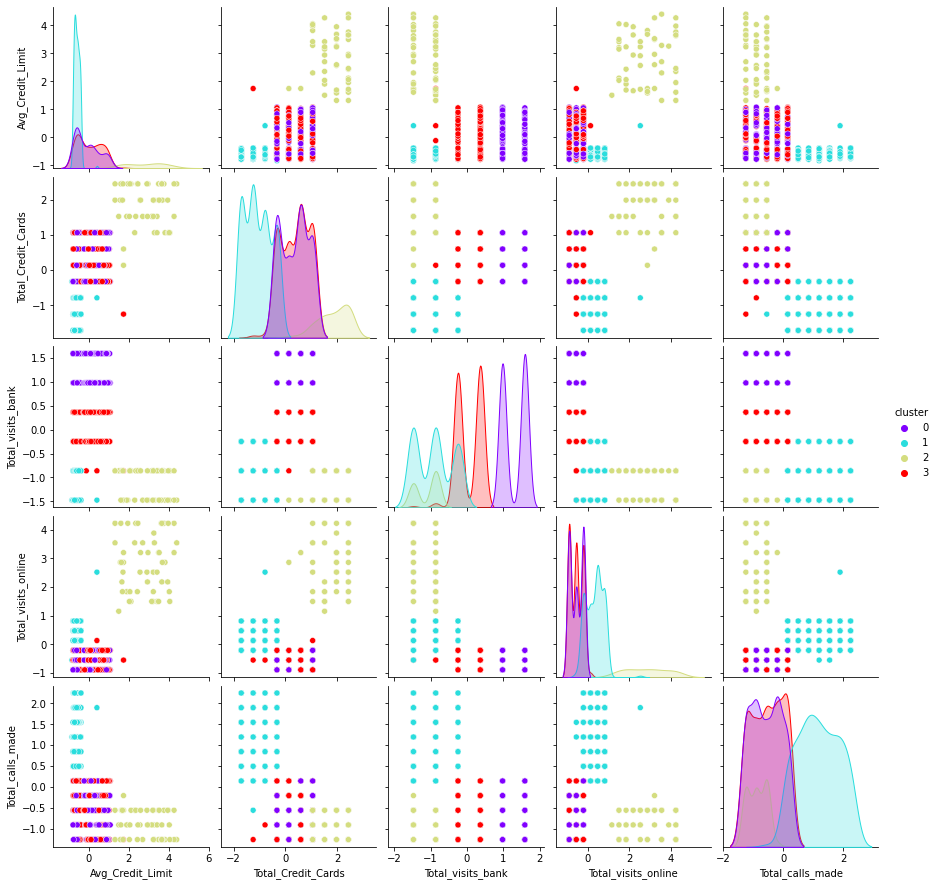

In [86]:
#----- Features -----#
sns.pairplot(scaled_df.drop(['Customer Key'],axis=1),hue='cluster', palette="rainbow")
plt.show()

###Elbow Method

In [87]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df.drop(['Customer Key','cluster'],axis=1))
    pred_i = kmeans.predict(scaled_df.drop(['Customer Key','cluster'],axis=1))
    error_rate.append(kmeans.inertia_)

Text(0, 0.5, 'Error Rate')

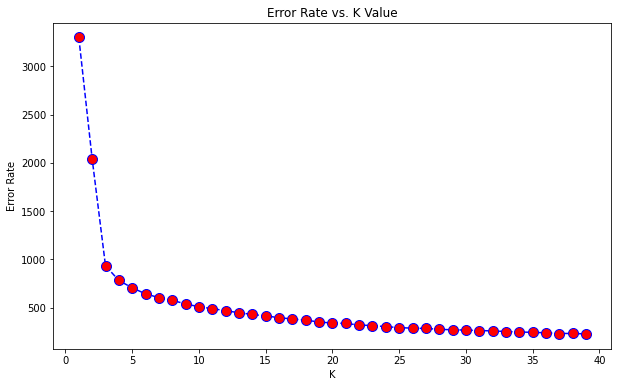

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### ANOVA TEST
É importante investigar se a variabilidade entre os clusters é significativamente superior à variailidade interna a cada cluster. O teste F da análise de variância de um faotr permite fazer essa análise.

- $H_{0}$: A variável em análise apresenta a mesma média em todos os grupos formados;
- $H_{1}$: A variável em análise apresenta média diferente em ao menos um dos grupos em relação aos demais;

Nesse sentido, é possível aplicar um único teste F para cada variável com o intuito de avaliar a existência de ao menos uma diferença entre todas as possibilidades de comparação.
A estatística de teste é dada por:

$F=\frac{variabilidade entre grupos}{variabilidade dentro dos grupos}= \frac{\frac {\sum{k=1}^{K}N*(\bar{X_{k}}-\bar{X})²}{K-1}}
{\frac{\sum{ki}(X_{ki}-\bar{X_{k}})²}{n-K}}$

Desse modo, é possível identificar às variáveis cujas médias mais se diferem entre os grupos. De outro modo, **É possível encontrar quais são as variáveis que mais contribuem para a formação de ao menos um dos cluster.**

In [94]:
model = ols('Avg_Credit_Limit ~ cluster', data=scaled_df.drop('Customer Key',axis=1)).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster,31.85297,1.0,33.366797,1.177463e-08
Residual,628.14703,658.0,NaN,NaN


In [96]:
model = ols('Total_Credit_Cards ~ cluster', data=scaled_df.drop('Customer Key',axis=1)).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster,32.879109,1.0,34.498059,6.773797e-09
Residual,627.120891,658.0,NaN,NaN


In [97]:
model = ols('Total_visits_bank ~ cluster', data=scaled_df.drop('Customer Key',axis=1)).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster,85.839743,1.0,98.374192,1.054966e-21
Residual,574.160257,658.0,NaN,NaN


In [98]:
model = ols('Total_visits_online ~ cluster', data=scaled_df.drop('Customer Key',axis=1)).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster,0.551787,1.0,0.550575,0.458348
Residual,659.448213,658.0,NaN,NaN


In [99]:
model = ols('Total_calls_made ~ cluster', data=scaled_df.drop('Customer Key',axis=1)).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cluster,22.19637,1.0,22.899229,0.000002
Residual,637.80363,658.0,NaN,NaN
